# Handling missing values

In [3]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [4]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


#### The NaN value
Pandas represents missing data with NaN, which stands for 'Not a Number'. This is a special floating-point value from NumPy. We can perform operations with NaN values without resulting in errors, but the result of any operations with a NaN value will be another NaN value. Try out the following

In [5]:
np.nan
#nan
np.nan+2
#nan
np.nan*0
#nan

nan

Pandas has several built-in functions that helps us detect, remove and replace NaN values such as

- isnull()
- notnull()
- dropna()
- fillna()

#### Detecting missing values


In [6]:
df.isnull()[0:10]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [1]:
df.isnull().sum()

NameError: name 'df' is not defined

#### Dropping missing values

In [8]:
df2=df.dropna()

In [9]:
df2.isnull().sum().sum()

0

In [10]:
df.shape

(4803, 20)

In [11]:
df2.shape

(1493, 20)

**Indeed, a very big chunk of the data was removed,** so this is not very useful. We could instead opt to drop a row only if all the values in the row are NaN. We can do this by including the how='all'argument. Try this out:

In [12]:
df3 = df.dropna(how='all')
df3.shape
#(4803, 20)

(4803, 20)

In [13]:
df.dropna(axis=1);

then the two columns with lots of NaN values are dropped, but we also lose columns with only one, two or three NaN values, which ideally we would like to keep. On the other hand, if we use

In [14]:
df.dropna(how='all', axis=1);

Then as with the rows, no columns are dropped, and the DataFrame is unchanged. Pandas has a solution for this problem: with the parameter thresh, which allows us to mention a minimum number of non-null values for the row/column to be kept! Let's try this out:

In [15]:
df.dropna(thresh=4000, axis=1, inplace=True)

In [16]:
df.isnull().sum().sum()

6

If we take a look at the resulting DataFrame, we will notice that columns homepage and tagline were dropped, since they both contained less then 4000 non-null values. This actually removes almost all of our NaN without dropping an excessive number of rows or columns:

#### Replacing missing values
Dropping missing data decreases the number of samples in our data set and as a result the power of our analysis and the predictive strength for our machine learning models. Therefore it is preferable to first try to retain data by suitably replacing missing values before using dropna() as a last resort.

epending on the data there are multiple strategies to replace missing values. If we actually know the correct values or might be able to provide an argument for a reasonable value, we can correct them directly. Otherwise, we aim to infer or estimate the missing data points suitably. **For this, we might use methods like ffill, an estimate like the mean or use machine learning models like k-NN (see later).**

Pandas has a **function fillna()** that helps us replace missing values with some specific value that we can choose. Let's look once again where our missing data is:

In [17]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
overview                3
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [18]:
df['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [19]:
df['release_date'].head(5)

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [20]:
df['runtime'].head(5)

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [21]:
df['runtime'][0:5]

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [22]:
df['overview'].fillna(value='Overview not available', inplace=True)

In [23]:
df['overview'].isnull().sum()

0

Next, for the column 'release_date', we will be replacing the missing data by propagating the non-missing values, meaning that we replace the missing data with the closest non-missing value (in the same column) in either the forward or backward direction. The function fillna() allows us to do this with two parameters:

- ffill: for forward propagation
- bfill: for backward propagation

In [24]:
df.loc[df['release_date'].isnull(), 'release_date']

4553    NaN
Name: release_date, dtype: object

In [25]:
df.loc[4552:4554, 'release_date']  

4552    2012-03-28
4553           NaN
4554    2015-03-10
Name: release_date, dtype: object

In [26]:
df['release_date'].fillna(method='ffill')[4552:4555]

4552    2012-03-28
4553    2012-03-28
4554    2015-03-10
Name: release_date, dtype: object

In [27]:
df['release_date'].fillna(method='bfill')[4552:4555]

4552    2012-03-28
4553    2015-03-10
4554    2015-03-10
Name: release_date, dtype: object

In [28]:
df['runtime'].mean()


106.87585919600083

In [29]:
df['runtime'].fillna(value=df['runtime'].mean(), inplace=True)

In [30]:
df.isnull().sum().sum()

1

# Removing duplicate values


In [31]:
import pandas as pd
df =  pd.DataFrame({ 'color': ['blue','blue','red','red','blue'], 'value': [2,1,3,3,2]})

In [32]:
df

,color,value
0,blue,2
1,blue,1
2,red,3
3,red,3
4,blue,2


In [33]:
df.duplicated()


0    False
1    False
2    False
3     True
4     True
dtype: bool

In [34]:
df.duplicated(keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [35]:
df.duplicated(keep=False)

0     True
1    False
2     True
3     True
4     True
dtype: bool

In [36]:
df.loc[df.duplicated(),:]

,color,value
3,red,3
4,blue,2


In [37]:
df.drop_duplicates()

,color,value
0,blue,2
1,blue,1
2,red,3


In [38]:
df.drop_duplicates(keep='last')

,color,value
1,blue,1
3,red,3
4,blue,2


#### Duplicates from a particular column

In [39]:
df.drop_duplicates(['value'])

,color,value
0,blue,2
1,blue,1
2,red,3


In [40]:
df.drop_duplicates(['color'])

,color,value
0,blue,2
2,red,3


In [41]:
import pandas as pd
df = pd.read_csv('http://bit.ly/chiporders',sep='\t')

In [42]:
df[-8:]

,order_id,quantity,item_name,choice_description,item_price
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [43]:
df.duplicated().sum()

59

In [44]:
df.duplicated(['order_id']).sum()

2788

In [45]:
df.duplicated(['quantity']).sum()

4613

In [46]:
df.duplicated(['item_name']).sum()

4572

In [47]:
df.duplicated(['choice_description']).sum()

3578

In [48]:
df.duplicated(['item_price']).sum()

4544

In [49]:
for column in df.columns:
    x=df.duplicated([column]).sum()
    print(x)

2788
4613
4572
3578
4544


In [50]:
df.duplicated(['order_id','item_name','item_price']).sum()

249

In [51]:
df.drop_duplicates(['order_id','item_name','item_price'], keep = False).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4156 entries, 0 to 4619
Data columns (total 5 columns):
order_id              4156 non-null int64
quantity              4156 non-null int64
item_name             4156 non-null object
choice_description    2946 non-null object
item_price            4156 non-null object
dtypes: int64(2), object(3)
memory usage: 194.8+ KB


# Detecting and filtering outliers

In order to identify outlier candidates, we need to:

1) establish what we consider as 'normal

2) find a way to measure deviations from that 'normal'.

Outliers vs errors :

Some abnormal values can be the result of errors in the data and should be addressed in any case. Unlike errors, we consider outliers as legitimate values that are different or rare. When we discuss outliers below and in other units, we will assume that we have already cleared out the errors.

**Outliers can hold valuable information**

Outliers are often seen as abnormal and undesirable. However, in some fields, they can provide sought-after insights.

- Recognizing outliers in user behavior can help credit card firms identify potential fraud and network administrators identify attempted cyber attacks.
- In production cycles, outliers can help identify defective products that should not enter circulation.
- In predictive maintenance, outliers in time-series data for sensors and machines can be signs of imminent problems and a potential breakdown. Recognizing this early allows firms to intervene quickly and save time and money.
- **In science, outliers might give rise to unobserved phenomena (novelties) that advance our understanding of the field and down the line, the outlier in today's observational data becomes a standard part of tomorrow's textbooks.**

#### Practical outlier removal


In this unit, we will describe three methods for outlier detection and removal: by **inspection, z-scores and boxplots**. Here we will focus on outliers within single features.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We will work with a data set of 100'000 randomly generated samples with 6 features.
The first 5 features are created with the random.randn() function from NumPy. This function creates an array of specified shape (here 100'000 by 5) and uses a random number generator to fill this array with random values sampled from the standard normal (Gaussian) distribution. Concretely, as the documentation of the function states, it will return the array "filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1".

For the 5th feature, we will **manually introduce outliers** by adding 1000 to the last 100 values (i.e. 0.1% of our samples).
Finally, we will add a 6th feature with values sampled from an exponential distribution as an illustrative example that exhibits skewness. You don't need to worry about the details, but if you want to know more see the numpy documentation which has further references at the end.

In [53]:
# Create a random seed to make result reproducible
np.random.seed(0)


In [54]:
# Create 5 features with 100000 samples from Gaussian distribution each
df = pd.DataFrame(np.random.randn(100000, 5))

In [55]:
df[0:5]

,0,1,2,3,4
0,1.764052,0.400157,0.978738,2.240893,1.867558
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599
2,0.144044,1.454274,0.761038,0.121675,0.443863
3,0.333674,1.494079,-0.205158,0.313068,-0.854096
4,-2.552990,0.653619,0.864436,-0.742165,2.269755


In [56]:
# Add 1000 to the last 100 values of feature 4
df.iloc[-100:, 4] = df.iloc[-100:, 4] + 1000

In [57]:
# Create 6th feature with 100000 samples from exponential distribution
df[5] = np.random.exponential(1, 100000)

In [58]:
# Change feature names
df = df.add_prefix("X")
df.head()

,X0,X1,X2,X3,X4,X5
0,1.764052,0.400157,0.978738,2.240893,1.867558,0.540426
1,-0.977278,0.950088,-0.151357,-0.103219,0.410599,1.424513
2,0.144044,1.454274,0.761038,0.121675,0.443863,0.282623
3,0.333674,1.494079,-0.205158,0.313068,-0.854096,0.038750
4,-2.552990,0.653619,0.864436,-0.742165,2.269755,0.999036


#### Checking descriptive statistics and visualizations

In [59]:
df.describe().round(5)

,X0,X1,X2,X3,X4,X5
count,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000,100000.00000
mean,-0.00020,0.00235,0.00161,0.00196,1.00745,1.00622
std,0.99711,0.99915,1.00225,1.00057,31.61742,1.00696
min,-4.69459,-4.85212,-4.24712,-4.44663,-5.00230,0.00000
25%,-0.67891,-0.66917,-0.67574,-0.67561,-0.66450,0.29055
50%,0.00263,0.00315,0.00039,0.00118,0.00851,0.69563
75%,0.67424,0.67192,0.67740,0.67603,0.68245,1.39619
max,4.46661,4.22408,4.28586,4.24177,1002.53804,11.80068


For feature X4 the minimum, the median, and the 25th and 75th percentile are very similar to those of features X0 to X3. However the mean, standard deviation, and maximum are different.

*Comment: Accounting for the fact that we added 1000 to the last 100 samples the shift of the maximum was to be expected. But observe how these 100 samples have also influenced the mean and, in particular, the standard deviation (31.6 instead of ~1). We highlight this because this will have a significant impact on the outliers detected for X4 with the z-score method below.*

Finally for feature X5, we have a mean and std of 1 and the median is around two thirds between the minimum and the mean. Moreover, the minimum is 1 std away from the mean while the maximum is almost 11 std away from the mean. This suggests the data is right-skewed, i.e a longer tail on the right. We will need to take a closer look.

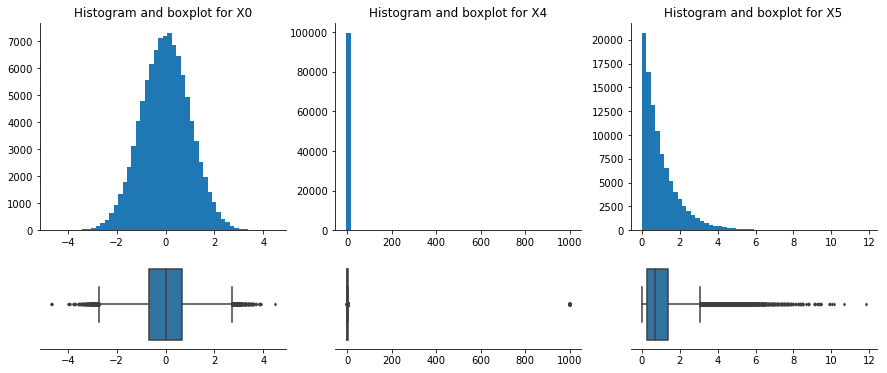

In [60]:
fig, axes = plt.subplots(
    2, 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    ["X0", "X4", "X5"], [0, 1, 2]  # pairing feature with column in plot
):
    axes[0, plot_col].hist(df[feat], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feat], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

#### Manual outlier removal

sns.distplot(df["X4"], kde=False)
plt.yscale("log")
plt.ylim(1, 100000)
plt.show()

As this group makes up only 0.1% we would likely consider them as outliers and set an upper bound at 200, say, to first identify and then remove these samples.

In [62]:
filter_200 = df["X4"] > 200
outliers_manual = df.loc[filter_200, "X4"]
outliers_manual.head()

99900     999.019554
99901    1000.315769
99902    1000.443100
99903    1001.435870
99904    1000.534458
Name: X4, dtype: float64

In [63]:
df_keep = df.loc[~filter_200, "X4"]
df_keep.shape

(99900,)

#### Using Z-scores to identify outlier candidates

A common method for deciding what constitutes an outlier for data that is approximately normally distributed is the "3 times the standard deviation from the mean" rule. Suppose we have a value 
x
, and we want to decide if it is an outlier or not. Let 
μ
 be the mean value of our data set. We then look at 
|
x
−
μ
|
 (recall 
|
|
 denotes the absolute value), which measures how far away 
x
 is from the mean. If this absolute value is more than 3 times the standard deviation 
σ
 of the data set, then 
x
 is considered an outlier.

In order to apply this rule, we use boolean indexing again. We compute the mean and standard deviation with the mean() and std() functions. We then select the entries which are more than 3 times the standard deviation away from the mean.

In [67]:
zfilterX0 = np.abs(df["X0"] - df["X0"].mean()) > (3 * df["X0"].std())
zfilterX0.head()

0    False
1    False
2    False
3    False
4    False
Name: X0, dtype: bool

In [68]:
df.loc[zfilterX0, "X0"].head()

1470    3.211847
2763   -3.694285
3178   -3.007413
3809    3.301367
3833   -3.432215
Name: X0, dtype: float64

In [69]:
zfilter_df = np.abs(df - df.mean()) > (3 * df.std())

In [70]:
zfilter_df.head(5)

,X0,X1,X2,X3,X4,X5
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


z = (x −μ) / σ


In [71]:
zscores_df = (df - df.mean()) / (df.std())
zfilter_df2 = np.abs(zscores_df) > 3
# Check the two zfilters are identical
print("Both approaches are equivalent:", zfilter_df.equals(zfilter_df2))

Both approaches are equivalent: True


#### Filter outliers of single features



In [72]:
print("Number of outliers detected per feature using z-scores:")
print(zfilter_df.sum(axis=0))
print("Total number of outliers detected:", zfilter_df.sum(axis=0).sum())


Number of outliers detected per feature using z-scores:
X0     255
X1     290
X2     272
X3     271
X4     100
X5    1858
dtype: int64
Total number of outliers detected: 3046


You may remember that roughly 99.73% of the values of a normal distribution lie within the 
|
x
−
3
μ
|
 interval, which means that roughly 0.27% lie outside of it. And indeed, for the features X0 to X3, we get around 270 outliers.

**Outliers and skewness affect the mean and the standard deviation and in turn, they affect the z-scores calculated from them.**

Indeed, for feature X4 we only get 100 outlier candidates. This is due to the standard deviation of X4 being significantly larger and as a result, the bounds are further apart (-93.8 and 95.8). So the final 100 values of X4, which we changed by hand, are the only values that fail the criteria of being within 3 standard deviations from the mean.

The larger number of outliers candidates for feature X5 is due to the large right-hand tail (right-skewness) of the exponential distribution, which does not follow the behavior of a normal distribution. (In fact, to find an interval around the mean that contains around 99.75% of the exponential distribution we would need use 5 standard deviations, i.e. 
|
x
−
5
μ
|
)

#### Filtering outliers using all features

Now we would like to use our filter to select all rows which have a True value in any of the columns. We can do this using pandas' any() function, which returns a Series of booleans. We have two ways of applying it:

- axis=0 gives a value to each column: True if there was a True entry anywhere in the column, and False otherwise
- axis=1 gives a value to each row: True if there was a True entry anywhere in the row, and False otherwise.

We are interested in the second option since we want to detect all rows that have an outlier value in any of the five columns. Let's give it a go:

In [73]:
zfilter_any  = zfilter_df.any(axis=1)
zfilter_any.head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [74]:
outliers = df.loc[zfilter_any, :]
outliers.shape

(3018, 6)

In [75]:
df_wo = df.drop(outliers.index, axis=0)

#### Using the interquartile range to identify outlier candidates
Two advantages of boxplots are that they are based on robust statistics (quartiles and the IQR) and that they highlight outlier candidates in the plot. Let's take a look at the plots again.

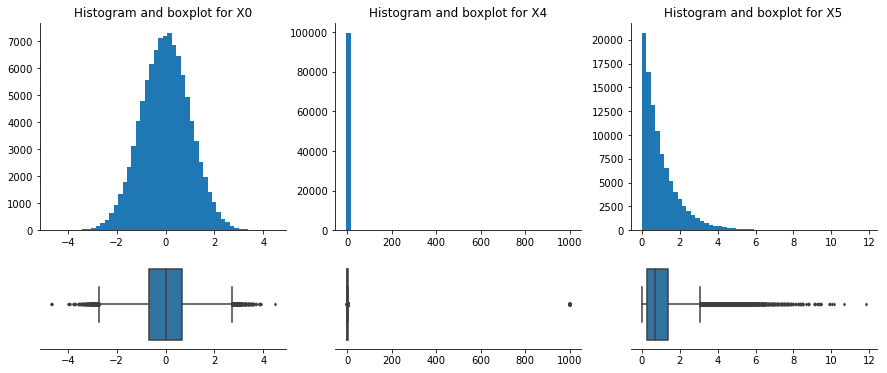

In [76]:
fig, axes = plt.subplots(
    2, 3, gridspec_kw={"height_ratios": (0.7, 0.3)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    ["X0", "X4", "X5"], [0, 1, 2]  # pairing feature with column in plot
):  
    axes[0, plot_col].hist(df[feat], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df[feat], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

In [77]:
Q1 = np.percentile(df, 25, axis=0)
Q3 = np.percentile(df, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Print lower and upper bound for X0
print("Lower bound: {:.4f}, upper bound: {:.4f}".format(lower_bound[0], upper_bound[0]))

Lower bound: -2.7087, upper bound: 2.7040


In [78]:
boxplot_filter = (df < lower_bound) | (df > upper_bound)
print("Number of outliers detected per feature using a boxplot:")
print(boxplot_filter.sum(axis=0))
print("Total number of outliers detected:", boxplot_filter.sum(axis=0).sum())

Number of outliers detected per feature using a boxplot:
X0     648
X1     757
X2     679
X3     687
X4     818
X5    4742
dtype: int64
Total number of outliers detected: 8331


**Observe that for X4 the boxplot still flags 818 outliers for the data near 0, while the z-score only gave the 100 data values near 1000. This is because the quartiles and the interquartile range are robust statistics that are unaffected by this small set of data points near 1000.**

#### Problems with outlier detection methods
##### The data contains multiple sub-populations
A key part of the application of z-scores, boxplots, and similar statistical methods is the assumption of dealing with a single population. Visualizations, especially histograms and distribution plots, are key tools for checking this assumption.
Special care needs to be taken when the data contains different sub-populations so that feature values could be clustered into different groups. Suitable visualizations will be important for guidance here. The data of each of these groups might be generated by a different mechanism without being an outlier. Consider data about people's monthly spending. We might identify groups with different behavior, e.g people commuting to work by car, bike, or public transport. It would be unreasonable to consider any group as outliers or exclude them entirely from the analysis.
When we have sub-populations we might wish to identify these individual groups and then analyze them for outliers in isolation, potentially using different techniques for different groups. For example, after some investigations, we might decide that the samples near 1000 in X4 are not outliers but that they form a (very) small subpopulation that should be treated separately.

##### Outliers can affect statistics and thus outlier detection
As we have seen for X4 statistics like the mean and the standard deviation are affected by the presence of a few outliers. As a result, so were the z-scores. This clearly affected the number of outlier candidates. One option is to work with robust statistics, like the median, that are less affected by outliers. For example, robust z-scores mimick the idea of z-scores but the mean is replaced by the median and the standard deviation by the median absolute deviation (MAD).

z
r
o
b
u
s
t
=
x
−
median
 /MAD
where
MAD
=
C
⋅
median
|
(
x
−
median
)
|
For further details on the MAD, including values used for 
C
 see this link.
 
 
##### The distribution of feature values is skewed
Both z-scores and boxplots assume the data is roughly symmetrically distributed around the 'center' of the data and they measure a distance from this center to identify possible outliers in both directions. As the feature X5 shows, skewness affects the number of identified outliers by both methods.
Unless the data distribution looks vaguely like a Gaussian distribution, i.e. the distribution is a single population that is approximately symmetric and bell-shaped, then z-scores are not suitable and you should consider other methods like visual inspection, other statistical tests, or even machine learning approaches for outlier detection.
We can sometimes reduce skewness by applying different transformations to the data to make it approximately Gaussian and then apply z-scores or boxplots. We will see more about using transformations later in the program.
Alternatively, one can choose a different multiplier in the definition of the fence and the whiskers of the boxplot; one can use adjusted boxplots, which are based on various measures of skewness to define individual lengths for the two whiskers.

Note that despite some shortcomings, z-scores are commonly used in data science as they are fast and easy to implement on large data sets, for example, we don't need to sort the data first to identify the median or the quartiles. Thus in later units, we will apply z-scores, potentially having transformed the data first. However, you are welcome to explore alternatives like robust z-scores.

#### Outliers for combinations of features

In this unit, we focused on some common techniques for outliers in individual features. As the example below shows, this approach might not always be suitable.
In this scatterplot, we plot the z-scores of features X0 and X1. We have plotted in orange all points that were flagged as outliers in one of the two features. The light blue rectangular region is considered 'normal' by both features according to the z-score method. However, it appears that most of the points form a disc, i.e. the boundary of the 'normal' region appears to be circular. (The radius of the circle was simply chosen by inspection.) From this perspective, some points in the corners of the rectangle could be considered outliers now, while some of the outlier candidates now fall into the new 'normal' region. The choice of which points to consider outliers and how to handle them is ours to make and may depend on the context.

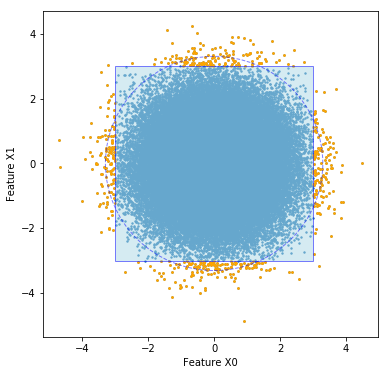

In [87]:
fig = plt.figure(figsize = (6,6))
# Mark square corresponding to zone 3 std from the means of X0 and X1
rectangle = plt.Rectangle((-3, -3), 6, 6, fc="lightblue", ec="blue", alpha=0.5)
plt.gca().add_patch(rectangle)

# Add circular outline
circle = plt.Circle((0, 0), 3.3, ec="blue", linestyle="--", alpha=0.5, fill=False)
plt.gca().add_patch(circle)

# Plot z_scores of features X0 and X1
plt.scatter(x=zscores_df["X0"], y=zscores_df["X1"], s=2)

# Identify and plot z-score outliers in features X0 and X1
df_out = zscores_df[(np.abs(zscores_df.loc[:, "X0":"X1"]) > 3).sum(axis=1) > 0].loc[
    :, "X0":"X1"
]

plt.scatter(x=df_out["X0"], y=df_out["X1"], s=3, c="orange")
plt.xlabel("Feature X0")
plt.ylabel("Feature X1")
plt.show()

#### In summary
**An important part of data science projects is to check for outliers as these samples can affect our analytical results and our machine learning models.** However, outlier detection methods only flag outlier candidates. It is our decision on how to handle these points based on further analysis.

Some important first steps are visualizations and descriptive statistics. In this unit, we demonstrated how to identify and remove outlier candidates using visual inspection, z-scores, and boxplots. We also highlighted scenarios where these methods should be used with care or should be adjusted.

 #### Exercise: multiple filtering

In [90]:
df_movies=pd.read_csv('tmdb_5000_movies.csv')
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [107]:
#Find the names of all the movies whose length is at least 180min
df_long_movies = df_movies[df_movies['runtime']>180]['original_title']
df_long_movies

24                                          King Kong
25                                            Titanic
110                                      Pearl Harbor
329     The Lord of the Rings: The Return of the King
676                                        Wyatt Earp
690                                    The Green Mile
855                                 Gods and Generals
880                                        Grindhouse
1091                                            Nixon
1109                                    Heaven's Gate
1125                                        Cleopatra
1181                                              JFK
1333                                         Magnolia
1387                                        Malcolm X
1477                                             Reds
1663                      Once Upon a Time in America
1759                                  The Right Stuff
1818                                 Schindler's List
1922                        

##### Using multiple filtering, find the names of all the movies whose length is at least 180min, or whose vote average is at least 8.0

In [108]:
df_long_movies2 = df_movies[(df_movies['vote_average']> 8.0) | (df_movies['runtime']>180) ]['original_title']
df_long_movies2

24                                          King Kong
25                                            Titanic
65                                    The Dark Knight
95                                       Interstellar
96                                          Inception
110                                      Pearl Harbor
329     The Lord of the Rings: The Return of the King
662                                        Fight Club
676                                        Wyatt Earp
690                                    The Green Mile
809                                      Forrest Gump
855                                 Gods and Generals
880                                        Grindhouse
1091                                            Nixon
1109                                    Heaven's Gate
1125                                        Cleopatra
1181                                              JFK
1333                                         Magnolia
1387                        

##### Using multiple filtering find the names of all the movies whose length is at least 180min, and whose vote average is at least 8.0

In [109]:
df_long_movies3 = df_movies[(df_movies['vote_average']> 8.0) & (df_movies['runtime']>180) ]['original_title']
df_long_movies3

329     The Lord of the Rings: The Return of the King
690                                    The Green Mile
1663                      Once Upon a Time in America
1818                                 Schindler's List
2731                           The Godfather: Part II
3723                             Anne of Green Gables
4535                                             七人の侍
Name: original_title, dtype: object

##### Using multiple filtering, find the names of all the movies whose length is at least 180min, and whose vote average is at least 8.0 and whose original language is not English

In [114]:
df_long_movies4 = df_movies[(df_movies['vote_average']> 8.0) & (df_movies['runtime']>180) & (df_movies['original_language']!='en')]['title']
df_long_movies4

4535    Seven Samurai
Name: title, dtype: object

This exception is thrown whenever we try to get the boolean of a pandas Series. When we use the statement or Python implicitly converts the two operands to booleans. Since the operands, in this case, are pandas Series the exception is thrown. To avoid this exception, and to do element-wise comparison, you can use the (bitwise) logical operators | and & or the numpy functions np.logical_or(x,y) and np.logical_and(x,y). For more details on this, you can consult the following StackOverflow post Truth value of a Series is ambiguous.